# Statistics I

* Scikit-HEP project
* Reading simple ROOT files
* Histograms
* Data visualization
* Fitting

## About me

* Working with the LHCb experiment since 2016
* Before astroparticle physicist working with Pierre Auger Observatory and IceCube
* Statistics convener in LHCb (2019-2021, 2024-now)
* Interests
  * Statistics
  * High-performance computing
  * API design: "Make Interfaces Easy to Use Correctly and Hard to Use Incorrectly" *Scott Meyers*

## [Scikit-HEP project](https://scikit-hep.org)
* Provides high-performance data analysis tools in Python
* Partially funded by NSF grants
* Many LHCb developers: Eduardo Rodrigues, Chris Burr, myself, ...
* Core values
    * Specialized tools that integrate well with existing Python ecosystem
    * Easy to use for beginners
    * Flexible for power users
    * Good documentation
    * Easy installation

##  The power of combinatorics

Build everything from basic components that fit together

<img src="https://images.unsplash.com/photo-1621453417173-c4b72482b13e?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1171&q=80" width=45%/>

Image credit: Toni Zaat on Unsplash

## Important packages

* Python scientific stack
    * [Numpy](https://github.com/numpy/numpy): fast computation with arrays
    * [Scipy](https://github.com/scipy/scipy): integration, statistical distributions, special functions, ...
    * [Matplotlib](https://github.com/matplotlib/matplotlib): scientific plotting
    * [Numba](https://github.com/numba/numba): JIT Compiler for Python (very fast)
    * [Pandas](https://pandas.pydata.org/): Convenient processing of tabular data

* [Scikit-HEP Project](https://scikit-hep.org/)

    * [uproot](https://github.com/scikit-hep/uproot): fast reading and writing of ROOT Trees
    * [particle](https://github.com/scikit-hep/particle): get particle properties from PDG IDs
    * [boost-histogram](https://github.com/scikit-hep/boost-histogram): multi-dimensional generalised histograms
    * [iminuit](https://github.com/scikit-hep/iminuit): fitting and error computation package
    * [resample](https://github.com/scikit-hep/resample): Easy bootstrapping to compute uncertainty and bias
    * [pyhf](https://github.com/scikit-hep/pyhf): for histogram fitting/limit setting and preserving likelihoods

* Other packages
    * [jacobi](https://github.com/hdembinski/jacobi): Easy numerical error propagation
    * [numba-stats](https://github.com/hdembinski/numba_stats): Fast statistical distributions for fitting
    * [tabulate](https://github.com/astanin/python-tabulate): Convert data tables to various formats (LaTeX, HTML, Markdown, ...)
    * [scikit-learn](https://scikit-learn.org/stable/): Basic machine learning tools
    * [xgboost](https://xgboost.readthedocs.io/en/stable/): Gradient-boosting machine library that won many Kaggle competitions

**Install everything with `pip install LIBRARY`**

## Working with Jupyter notebooks

* I recommend to use [vscode](https://code.visualstudio.com/)
    * Very good Jupyter notebook support
    * Remote explorer: edit and run code on remote machines

## Prepare computing environment

* In terminal, create and enter virtual environment (you need Python-3.8 or later)
  ```
  python3 -m venv .venv
  source .venv/bin/activate
  ```
* Install packages
  ```
  python -m pip install --upgrade numba matplotlib uproot boost-histogram iminuit scipy particle numba_stats ipywidgets
  ```

<img src="https://raw.githubusercontent.com/scikit-hep/uproot/master/docs/source/logo-300px.png" width=15%/>

* uproot provides fast and convenient access to ROOT trees

[<img src="https://raw.githubusercontent.com/scikit-hep/uproot/master/docs/logscales.png" width="60%"/>](https://raw.githubusercontent.com/scikit-hep/uproot/master/docs/logscales.png)

In [1]:
import uproot

print(f"uproot {uproot.__version__}")

uproot 5.2.2


In [2]:
f = uproot.open("example.root")
event = f["event"]
 
event.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
trk_len              | int32_t                  | AsDtype('>i4')
mc_trk_len           | int32_t                  | AsDtype('>i4')
trk_imc              | int32_t[]                | AsJagged(AsDtype('>i4'))
trk_px               | float[]                  | AsJagged(AsDtype('>f4'))
trk_py               | float[]                  | AsJagged(AsDtype('>f4'))
trk_pz               | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_px            | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_py            | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_pz            | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_pid           | int32_t[]                | AsJagged(AsDtype('>i4'))


* Tree contains fake simulated LHCb events

* Truth in simulation
    * mc_trk_len: number of true particles in event
    * mc_trk_px: x-component of true momentum of particle
    * mc_trk_py: y-component of true momentum of particle
    * mc_trk_pz: z-component of true momentum of particle
    * mc_trk_pid: particle ID (PDG ID)

* Reconstructed simulation
    * trk_len: number reconstructed tracks in event
    * trk_px: x-component of momentum of reconstructed track
    * trk_py: y-component of momentum of reconstructed track
    * trk_pz: z-component of momentum of reconstructed track
    
* Special
    * trk_imc: index of matched true particle or -1

In [3]:
# get branches as arrays
arr = event.arrays(["trk_len", "trk_px", "mc_trk_len", "mc_trk_px"])

trk_len = arr["trk_len"]
trk_px = arr["trk_px"]
mc_trk_len = arr["mc_trk_len"]
mc_trk_px = arr["mc_trk_px"]

In [4]:
trk_len

<Array [6, 7, 2, 6, 7, 7, 6, 7, ..., 13, 3, 6, 3, 4, 6, 3] type='1000 * int32'>

**Exercise**: Explore some other arrays from `event`

In [5]:
# do exercise here

* Some branches are 2D (e.g. trk_px)
* First index iterates over events
* Second index iterates over tracks per event

In [6]:
for ievent in range(5):
    print(ievent, trk_len[ievent], trk_px[ievent])

0 6 [-0.979, 0.232, -0.464, 0.629, 0.0287, 0.156]
1 7 [-0.59, 0.102, -0.282, -0.585, 0.0525, -0.249, -0.0836]
2 2 [0.124, 0.309]
3 6 [-0.287, 0.0082, -0.671, -0.933, -0.011, 0.0323]
4 7 [-0.086, -0.101, 0.0523, 0.204, -0.0287, 0.115, 0.0954]


* Mathematical operators and slicing works on these arrays similar to Numpy


In [7]:
trk_len[:10]

<Array [6, 7, 2, 6, 7, 7, 6, 7, 4, 6] type='10 * int32'>

In [8]:
trk_len > 10

<Array [False, False, False, ..., False, False, False] type='1000 * bool'>

* Many numpy functions work on awkward arrays

In [9]:
import numpy as np
print(np.__version__)

1.24.4


In [10]:
np.sum(trk_len)

5032

**Exercise**

* Use numpy functions to count how many events have zero tracks
* Hint: use `np.sum` and array mask

In [11]:
# do exercise here

In [12]:
# solution

f"{np.sum(trk_len == 0)} events with zero tracks"

'5 events with zero tracks'

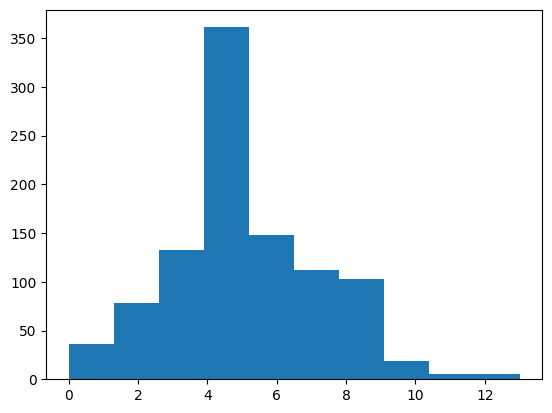

In [13]:
# let's plot some things
import matplotlib.pyplot as plt

plt.hist(trk_len);

* For some operations and awkward arrays, we need the awkward library

In [14]:
import awkward as ak
print(ak.__version__)

2.6.1


**Exercise**
* Try to plot `trk_px`
* Can you figure out from the error message why it does not work?
* Fix the issue with the function `ak.flatten`

In [15]:
# do exercise here

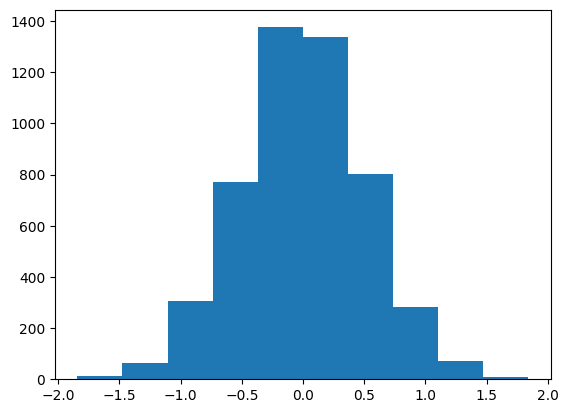

In [16]:
# solution

# plt.hist(trk_px) fails with helpful error message
plt.hist(ak.flatten(trk_px));

## Reading data from a large tree

* Tree often do not fit into memory (tree size > 100 GB and more possible)
* Iterate over chunks

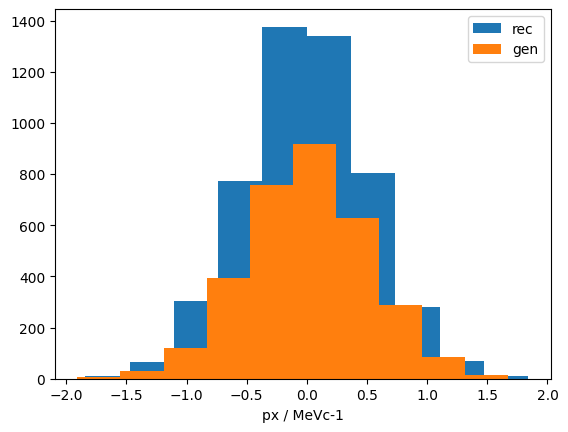

In [17]:
for chunk in event.iterate(["trk_px", "mc_trk_px"]):

    plt.hist(ak.flatten(chunk["trk_px"]), label="rec")
    plt.hist(ak.flatten(chunk["mc_trk_px"]), label="gen")
    plt.xlabel("px / MeVc-1")
    plt.legend()

    # stop after reading one chunk
    break

## Accelerate Python code with Numba

* Just-In-Time compiler for scientific Python code
* Very powerful and very fast
* Fast for loops
* Not all Python code supported, works best with numerical code
* Only use when needed

In [18]:
import numba as nb
print(f"numba {nb.__version__}")

numba 0.57.1


* let's subtract reconstructed from true momentum to check momentum resolution
* need to select tracks matched to MC particles
* this is relatively slow in Python, even if we use array computations

In [19]:
%%timeit -n 1 -r 3

delta_px = []
for chunk in event.iterate(["trk_px", "trk_imc", "mc_trk_px"]):
    for px, imc, mc_px in zip(chunk["trk_px"], chunk["trk_imc"], chunk["mc_trk_px"]):
        # select only tracks with associated true particle
        mask = imc >= 0
        subset_px = px[mask]
        subset_mc_px = mc_px[imc[mask]]
        # conversion to numpy needed
        delta_px = np.append(delta_px, subset_px - subset_mc_px) 

963 ms ± 35.4 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [20]:
# awkward arrays can be used in Numba

@nb.njit
def calc(chunk):
    r = []
    # loop over events
    for px, imc, mc_px in zip(chunk["trk_px"], chunk["trk_imc"], chunk["mc_trk_px"]):
        # loop over reconstructed tracks per event
        for px_i, imc_i in zip(px, imc):
            if imc_i < 0:
                continue
            mc_px_i = mc_px[imc_i]
            r.append(px_i - mc_px_i)
    return r

In [21]:
# function is JIT-compiled on first call with new data types
for chunk in event.iterate(["trk_px", "trk_imc", "mc_trk_px"]):
    calc(chunk)
    break

In [22]:
%%timeit -n 1 -r 3
delta_px = []
for data in event.iterate(["trk_px", "trk_imc", "mc_trk_px"]):
    d = calc(data)
    delta_px = np.append(delta_px, d)

4.17 ms ± 1.17 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


* Created array `delta_px` could still become very large in memory
* Better: Create histogram object first and then fill iteratively with chunks

<img src="https://raw.githubusercontent.com/scikit-hep/boost-histogram/develop/docs/_images/BoostHistogramPythonLogo.png" width=25%/>

* Python frontend to Boost.Histogram library in C++ from the Boost project
* Very fast and flexible
* Multi-dimensional histograms and other binned statistics (profiles!)
* Supports weighted data
* And much much more, see docs

In [23]:
import boost_histogram as bh
print(f"boost-histogram {bh.__version__}")

boost-histogram 1.4.0


In [24]:
# make an axis
xaxis = bh.axis.Regular(20, -2, 2)

# easy to make several histograms with same binning by reusing axis
h_px = bh.Histogram(xaxis)
h_mc_px = bh.Histogram(xaxis)

In [25]:
# let's use a finer binning for this one
h_delta_px = bh.Histogram(bh.axis.Regular(100, -2, 2))

In [26]:
# incremental filling
for data in event.iterate(["trk_px", "trk_imc", "mc_trk_px"]):
    h_px.fill(ak.flatten(trk_px))

In [27]:
h_px

Histogram(Regular(20, -2, 2), storage=Double()) # Sum: 5032.0

In [28]:
print(h_px)

                 ┌───────────────────────────────────────────────────────────┐
[-inf,   -2) 0   │                                                           │
[  -2, -1.8) 1   │▏                                                          │
[-1.8, -1.6) 3   │▎                                                          │
[-1.6, -1.4) 17  │█▎                                                         │
[-1.4, -1.2) 25  │█▊                                                         │
[-1.2,   -1) 78  │█████▌                                                     │
[  -1, -0.8) 181 │████████████▉                                              │
[-0.8, -0.6) 308 │█████████████████████▊                                     │
[-0.6, -0.4) 453 │████████████████████████████████▏                          │
[-0.4, -0.2) 647 │█████████████████████████████████████████████▉             │
[-0.2,    0) 819 │██████████████████████████████████████████████████████████ │
[   0,  0.2) 782 │██████████████████████████████████

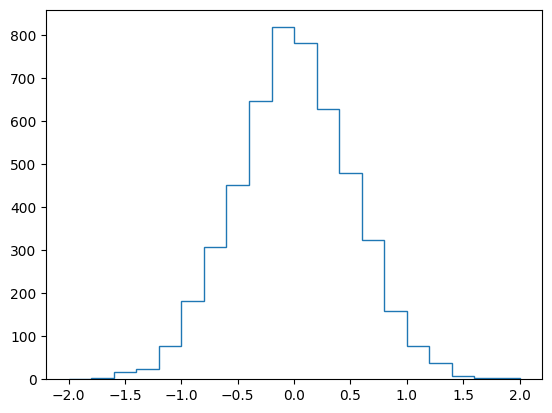

In [29]:
# plot histogram with plt.stairs
plt.stairs(h_px.values(), h_px.axes[0].edges);

**Exercise**
* Use iterative loop to fill `h_mc_px` and `h_delta_px`, use `calc` from before
* Plot all three histograms overlaid into one figure with `plt.stairs`

In [30]:
# do exercise here

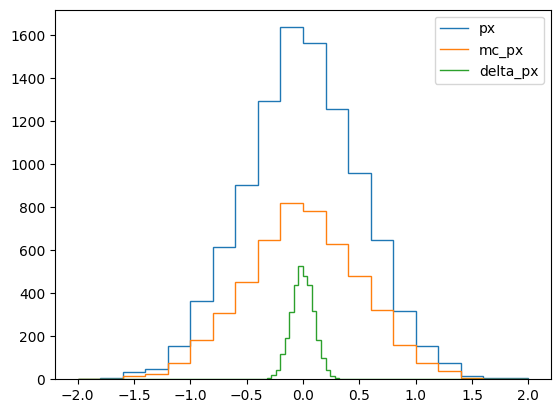

In [31]:
# solution

for chunk in event.iterate(["trk_px", "trk_imc", "mc_trk_px"]):
    h_px.fill(ak.flatten(chunk["trk_px"]))
    h_mc_px.fill(ak.flatten(chunk["trk_px"]))
    h_delta_px.fill(calc(chunk))
    
for h, label in ((h_px, "px"), (h_mc_px, "mc_px"), (h_delta_px, "delta_px")):
    plt.stairs(h.values(), h.axes[0].edges, label=label)
    
plt.legend();

* Histograms can be reduced
* Shrink axis range with slices and using `loc`
* Make binning coarser with `rebin`

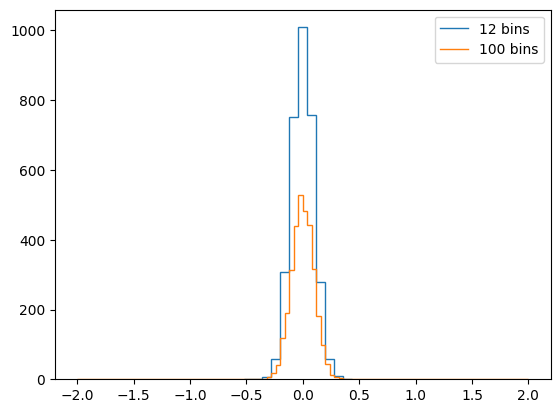

In [32]:
from boost_histogram.tag import loc, rebin

h_delta_px_2 = h_delta_px[loc(-0.5):loc(0.5):rebin(2)]

for h in (h_delta_px_2, h_delta_px):
    plt.stairs(h.values(), h.axes[0].edges,
               label=f"{len(h.values())} bins")
plt.legend();

## Beyond 1D histograms

* Supports advanced axis types (e.g. category axis)
* Supports higher dimensional histograms
* Supports generalized histograms with binned statistics (aka "profile" in ROOT)

In [33]:
# check detector momentum resolution in x for different particle species

p_axis = bh.axis.Regular(50, -2, 2)
pid_axis = bh.axis.IntCategory([], growth=True)

In [34]:
# profile: compute mean of reconstructed px in bins of mc_px for different particle species

p_2d = bh.Histogram(p_axis, pid_axis, storage=bh.storage.Mean())

In [35]:
branches = ["trk_px", "trk_imc", "mc_trk_px", "mc_trk_pid"]
for data in event.iterate(branches):
    for px, imc, mc_px, mc_pid in zip(*(data[b] for b in branches)):
        # select only tracks with associated true particle
        mask = imc >= 0
        px = px[mask]
        associated = imc[mask]
        mc_px = mc_px[associated]
        mc_pid = mc_pid[associated]

        p_2d.fill(mc_px, mc_pid, sample=px)

p_2d

Histogram(
  Regular(50, -2, 2),
  IntCategory([-321, 211, 2212, -2212, -211, 321], growth=True),
  storage=Mean()) # Sum: Mean(count=3240, value=0.000433322, variance=0.263444)

* We use `particle` library to look-up properties of particles based on their particle ID
* Get name, mass, life-time, quark content, ...

In [36]:
import particle
print(f"particle {particle.__version__}")

particle 0.23.1


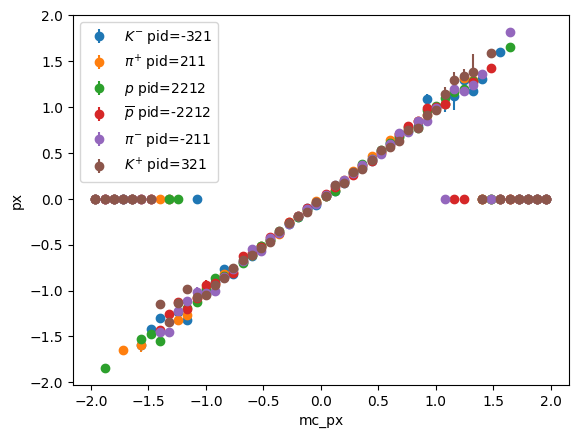

In [37]:
pids = p_2d.axes[1]
for i, pid in enumerate(pids):
    part = particle.Particle.from_pdgid(pid)

    x = p_2d.axes[0].centers
    y = p_2d.values()[:, i]
    ye = p_2d.variances()[:, i] ** 0.5
    plt.errorbar(x, y, ye, fmt="o", label=f"${part.latex_name}$ pid={int(part.pdgid)}")

plt.xlabel("mc_px")
plt.ylabel("px")
plt.legend();

**Exercise**
* Only show bins with sufficient entries, use `p_2d.counts()`

In [38]:
# do exercise here

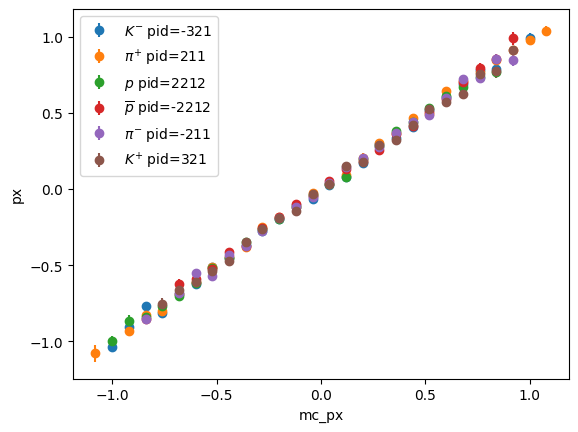

In [39]:
# solution

pids = p_2d.axes[1]
for i, pid in enumerate(pids):
    part = particle.Particle.from_pdgid(pid)

    x = p_2d.axes[0].centers
    y = p_2d.values()[:, i]
    ye = p_2d.variances()[:, i] ** 0.5

    ma = (p_2d.counts() > 5)[:, i]
    
    plt.errorbar(x[ma], y[ma], ye[ma], fmt="o",
                 label=f"${part.latex_name}$ pid={int(part.pdgid)}")

plt.xlabel("mc_px")
plt.ylabel("px")
plt.legend();

* We find that the reconstruction resolution is the same for all particle species
* Which means we can remove this axis by summing over its entries (called projection in ROOT)
* boost-histogram keeps track of events in overflow and underflow bins by default to make summing exact

In [40]:
p_1d = p_2d[:, sum] # remove PID axis by summing

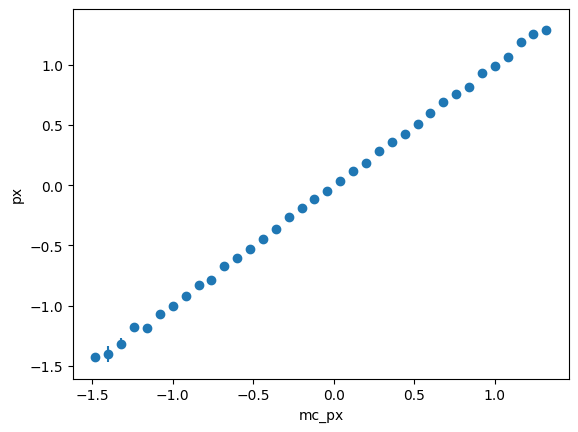

In [41]:
x = p_1d.axes[0].centers
y = p_1d.values()
ye = p_1d.variances() ** 0.5
m = p_1d.counts() >= 5

plt.errorbar(x[m], y[m], ye[m], fmt="o")

plt.xlabel("mc_px")
plt.ylabel("px");

## Fits

* Typical analysis work flow (often automated with Snakemake)
    1. Pre-select data
    2. Make histograms or profiles from pre-selected  data
    3. Fit histograms or profiles to extract physical parameters
* Many specialized fitting tools for individual purposes, e.g.: [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit)

* Generic libraries
    - [RooFit](https://root.cern.ch/roofit)
    - [zfit](https://github.com/zfit/zfit)
    - [pyhf](https://github.com/scikit-hep/pyhf)
    - [iminuit](https://github.com/scikit-hep/iminuit)
    - ...

* Fitting ("estimation" in statistics)
  * Adjust parametric **statistical model** to **dataset** and find **model parameters** which match dataset best
  * AI community calls this "learning"
  * **Estimate**: result of fit
* Dataset: samples $\{ \vec x_i \}$
  * Sample can be one-dimensional or multidimensional
  * Values can be continuous (e.g. candidate mass) or discrete (e.g. bin counts)
* Model: Probability density or probability mass function $f(\vec x; \vec p)$ which depends on unknown parameters $\vec p$

* Conjecture: maximum-likelihood estimate (MLE) $\hat{\vec p} = \text{argmax}_{\vec p} L(\vec p)$ is optimal, with $L(\vec p) = \prod_i f(\vec x_i; \vec p)$
  * **Proven**: Asymptotically optimal, unbiased with minimum variance
    * No proof for finite data sets, but unchallenged
  * **Universal**: MLE can be computed for any problem
  * Equivalent: minimize negative log-likelihood (NLL), $\hat{\vec p} = \text{argmin}_{\vec p}(-\ln L(\vec p))$
* Limiting case of maximum-likelihood fit: **least-squares fit** aka chi-square fit

<img src="https://raw.githubusercontent.com/scikit-hep/iminuit/develop/doc/_static/iminuit_logo.svg" width=25%/>

* Python frontend to Minuit2 C++ library maintained by ROOT team at CERN 
* Maximum-likelihood and least-squares fits with error estimation
* Easy to use for beginners, flexible for power users
* Comes with builtin cost functions for common fits
* Large number of tutorials

In [42]:
import iminuit
from iminuit import Minuit

print(f"iminuit {iminuit.__version__}")

iminuit 2.25.2


## iminuit vs. other packages

* pyhf
  * Better choice when you need to compute limits and preserve the likelihood
* zfit and RooFit
  * Help you build statistical models: automatic normalization & convolutions
    * This has to be done "by hand" in iminuit
  * Good for standard tasks, but restrict your freedom
* iminuit
    * Has good documentation
    * Well-designed API
    * Is very flexible and open
    * Is very fast with numba

* Typical fit in particle physics: mass distribution of decay candidates with signal peak over smooth background
* Task: get the number of signal candidates = signal yield
* Can be solved with a fit

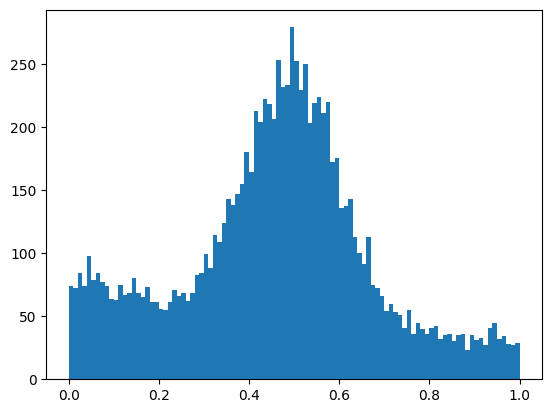

In [43]:
def make_data(size, seed=1):
    rng = np.random.default_rng(seed)
    s = rng.normal(0.5, 0.1, size=size // 2)
    b = rng.exponential(1, size=2 * size)
    b = b[b < 1]
    b = b[: size // 2]
    x = np.append(s, b)
    return x

x1 = make_data(10_000)
plt.hist(x1, bins=100);

- To apply maximum-likelihood method, we need statistical model
- Full sample is additive mixture of signal sample and background sample
- Assumption 1: signal is normal-distributed; pdf is $\mathcal{N}(\mu, \sigma)$ with parameters $\mu$ and $\sigma$
- Assumption 2: background is truncated exponential distribution

In [44]:
# fast implementations of statistical distributions, API similar to scipy.stats
from numba_stats import norm, truncexpon

# model pdf
def model1(x, z, mu, sigma, slope):
    s = norm.pdf(x, mu, sigma)
    b = truncexpon.pdf(x, 0.0, 1.0, 0.0, slope)
    return (1 - z) * b + z * s

# negative log-likelihood
def nll1(z, mu, sigma, slope):
    logL = np.log(model1(x1, z, mu, sigma, slope))
    return -np.sum(logL)

In [45]:
m = Minuit(nll1, z=0.5, mu=0.5, sigma=1, slope=1)
m.errordef = Minuit.LIKELIHOOD
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1790                      │              Nfcn = 209              │
│ EDM = 762 (Goal: 0.0001)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z     │   0.500   │   0.012   │            │            │         │         │       │
│ 1 │ mu    │   0.500   │   0.003   │            │            │         │         │       │
│ 2 │ sigma │   0.155   │   0.005   │            │            │         │         │       │
│ 3 │ slope │   1.00    │   0.07    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │         z        mu     sigma     slope │
├───────┼─────────────────────────────────────────┤
│     z │  0.000149     -1e-6  0.033e-3  -0.25e-3 │
│    mu │     -1e-6  9.19e-06     -0e-6    -68e-6 │
│ sigma │  0.033e-3     -0e-6  2.91e-05 -0.053e-3 │
│ slope │  -0.25e-3    -68e-6 -0.053e-3   0.00442 │
└───────┴─────────────────────────────────────────┘

* Fit did not work
* Plotting 1D or 2D slices of likelihood may help

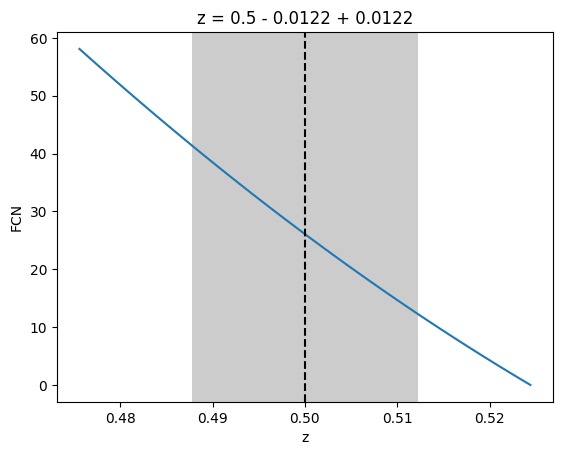

In [46]:
m.draw_profile("z");

* Increase print level

In [47]:
m.print_level = 1
m.migrad()
m.print_level = 0

W FCN result is NaN for [ 0.406325 0.495731 -0.0437361 1.13819 ]
W FCN result is NaN for [ nan nan nan nan ]
W FCN result is NaN for [ nan nan nan nan ]
W FCN result is NaN for [ nan nan nan nan ]
W FCN result is NaN for [ nan nan nan nan ]
W FCN result is NaN for [ nan nan nan nan ]
W FCN result is NaN for [ nan nan nan nan ]
W FCN result is NaN for [ nan nan nan nan ]
W FCN result is NaN for [ nan nan nan nan ]
W FCN result is NaN for [ nan nan nan nan ]
W FCN result is NaN for [ nan nan nan nan ]
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder Iterations finish without convergence; Edm 761.614 Requested 0.0001
W VariableMetricBuilder No convergence; Edm 761.614 is above tolerance 0.001
W FCN result is NaN for [ 0.406325 0.495731 -0.0437361 1.13819 ]
W FCN result is NaN for [ nan nan nan nan ]
W FCN result is NaN for [ nan nan nan nan ]
W FCN result is NaN for [ nan nan nan nan ]
W FCN result is NaN for [ nan nan nan nan ]
W FCN result is NaN for [ nan n

* fit failed because parameters need limits

**Exercise**

* Repeat fit, but with parameter limits.
* Set parameter limits by calling `m.limits["parameter"] = (lower, upper)` before `m.migrad()`
* You can set identical limits for multiple parameters, for example, `m.limits["a", "b"] = (0, 1)`

In [48]:
# do exercise here

In [49]:
# solution

m.limits["z", "mu"] = (0, 1)
m.limits["sigma", "slope"] = (0, None)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -2095                      │              Nfcn = 481              │
│ EDM = 1.78e-06 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z     │   0.498   │   0.009   │            │            │    0    │    1    │       │
│ 1 │ mu    │  0.4968   │  0.0020   │            │            │    0    │    1    │       │
│ 2 │ sigma │  0.0994   │  0.0020   │            │            │    0    │         │       │
│ 3 │ slope │   1.03    │   0.06    │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────┐
│       │        z       mu    sigma    slope │
├───────┼─────────────────────────────────────┤
│     z │ 8.94e-05    -1e-6    10e-6 -0.12e-3 │
│    mu │    -1e-6 4.21e-06    -0e-6   -27e-6 │
│ sigma │    10e-6    -0e-6 3.94e-06   -18e-6 │
│ slope │ -0.12e-3   -27e-6   -18e-6  0.00345 │
└───────┴─────────────────────────────────────┘

* compute asymmetric errors with Minos algorithm (profile likelihood method)

In [50]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -2095                      │              Nfcn = 692              │
│ EDM = 1.78e-06 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z     │   0.498   │   0.009   │   -0.009   │   0.009    │    0    │    1    │       │
│ 1 │ mu    │  0.4968   │  0.0021   │  -0.0020   │   0.0020   │    0    │    1    │       │
│ 2 │ sigma │  0.0994   │  0.0020   │  -0.0019   │   0.0020   │    0    │         │       │
│ 3 │ slope │   1.03    │   0.06    │   -0.06    │    0.06    │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           z           │          mu           │         sigma         │         slope         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.009   │   0.009   │  -0.002   │   0.002   │  -0.0019  │  0.0020   │   -0.06   │   0.06    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬─────────────────────────────────────┐
│       │        z       mu    sigma    slope │
├───────┼─────────────────────────────────────┤
│     z │ 8.94e-05    -1e-6    10e-6 -0.12e-3 │
│    mu │    -1e-6 4.21e-06    -0e-6   -27e-6 │
│ sigma │    10e-6    -0e-6 3.94e-06   -18e-6 │
│ slope │ -0.12e-3   -27e-6   -18e-6  0.00345 │
└───────┴─────────────────────────────────────┘

* you can compute 2D confidence regions with `mncontour` and draw them with `draw_mncontour` 

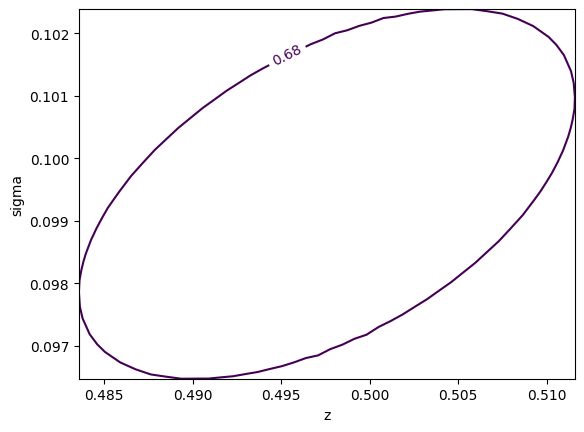

In [51]:
m.draw_mncontour("z", "sigma");

**Exercise**

* Draw 1,2,3 sigma contours, use keyword `cl`

In [52]:
# do exercise here

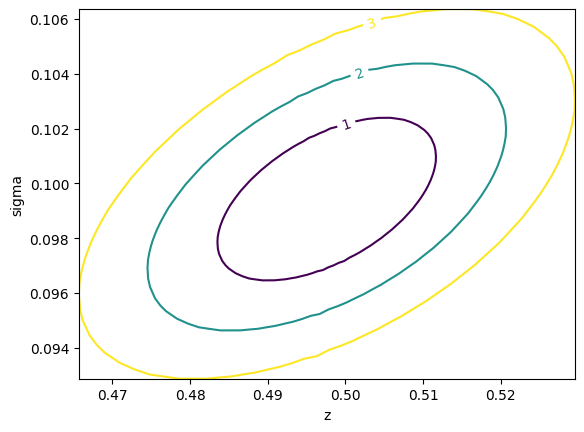

In [53]:
# solution

m.draw_mncontour("z", "sigma", cl=(1, 2, 3));

* for nice overview: compute matrix of likelihood profiles with `draw_mnmatrix`

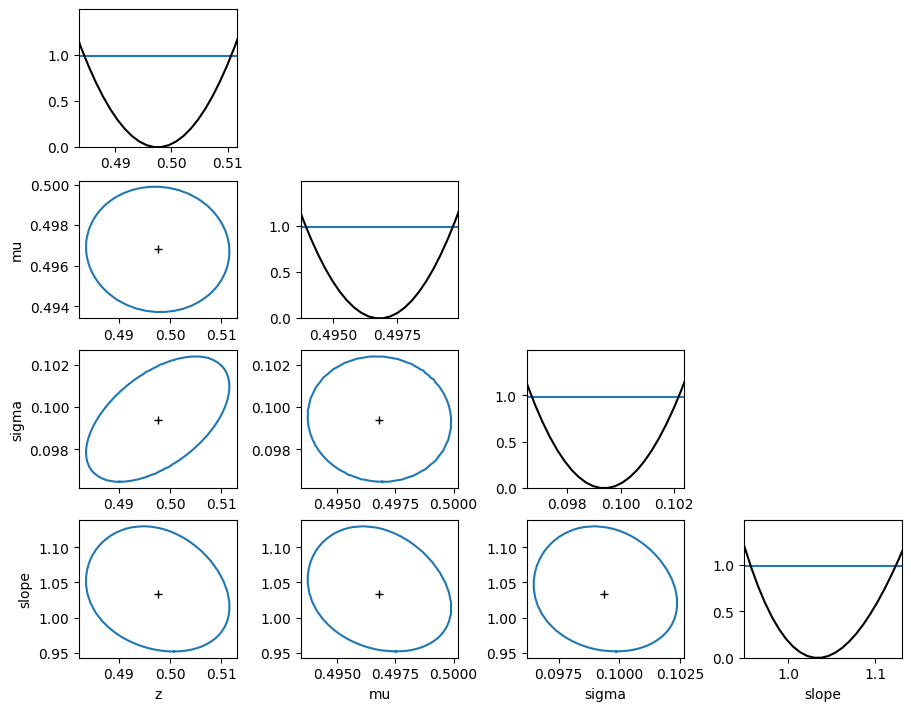

In [54]:
m.draw_mnmatrix(figsize=(9,7));

* Writing unbinned negative-log-likelihood is repetitive, only model ever changes
* Use built-in cost function from iminuit to get nice extras

In [55]:
from iminuit.cost import UnbinnedNLL

nll1 = UnbinnedNLL(x1, model1)
m = Minuit(nll1, z=0.5, mu=0.5, sigma=1, slope=1)
m.limits["z", "mu"] = (0, 1)
m.limits["sigma", "slope"] = (0, None)

In [56]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -4189                      │              Nfcn = 169              │
│ EDM = 8.37e-05 (Goal: 0.0002)    │            time = 0.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z     │   0.498   │   0.009   │            │            │    0    │    1    │       │
│ 1 │ mu    │  0.4968   │  0.0020   │            │            │    0    │    1    │       │
│ 2 │ sigma │  0.0994   │  0.0020   │            │            │    0    │         │       │
│ 3 │ slope │   1.03    │   0.06    │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────┐
│       │        z       mu    sigma    slope │
├───────┼─────────────────────────────────────┤
│     z │ 8.62e-05    -1e-6    10e-6 -0.11e-3 │
│    mu │    -1e-6 4.17e-06    -0e-6   -28e-6 │
│ sigma │    10e-6    -0e-6 3.83e-06   -17e-6 │
│ slope │ -0.11e-3   -28e-6   -17e-6  0.00345 │
└───────┴─────────────────────────────────────┘

**Exercise**

* Use interactive mode via `m.interactive()` to check how fit reacts to parameter changes
* Useful for debugging and to find starting values by hand

In [57]:
# do exercise here

## Faster fits?

* Option 1: accelerate NLL computation with Numba
* Option 2: use binned data

In [58]:
x2 = make_data(1_000_000)

In [59]:
m = Minuit(UnbinnedNLL(x2, model1), z=0.5, mu=0.5, sigma=1, slope=1)
m.limits["z", "mu"] = (0, 1)
m.limits["sigma", "slope"] = (0, None)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -4.216e+05                 │              Nfcn = 169              │
│ EDM = 0.000135 (Goal: 0.0002)    │            time = 5.9 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z     │ 499.7e-3  │  0.9e-3   │            │            │    0    │    1    │       │
│ 1 │ mu    │ 499.98e-3 │  0.20e-3  │            │            │    0    │    1    │       │
│ 2 │ sigma │ 99.59e-3  │  0.20e-3  │            │            │    0    │         │       │
│ 3 │ slope │   0.997   │   0.006   │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────┐
│       │        z       mu    sigma    slope │
├───────┼─────────────────────────────────────┤
│     z │ 8.87e-07 -0.01e-6  0.10e-6  -1.2e-6 │
│    mu │ -0.01e-6 4.18e-08       -0 -0.26e-6 │
│ sigma │  0.10e-6       -0 4.09e-08 -0.18e-6 │
│ slope │  -1.2e-6 -0.26e-6 -0.18e-6 3.06e-05 │
└───────┴─────────────────────────────────────┘

General insights
* Time spend in minimizer is negligible
* Bottleneck is evaluating NLL function
* Bottleneck inside NLL function is usually evaluation of model
* NLL computation is trivially parallelizable: log(pdf) computed independently for each data point
* Numba allows us to exploit auto-vectorization (SIMD instructions) and parallel computing on multiple cors

In [60]:
@nb.njit(parallel=True, fastmath=True, error_model="numpy")
def nll2(z, mu, sigma, slope):
    def model(x, z, mu, sigma, slope):
        s = norm.pdf(x, mu, sigma)
        b = truncexpon.pdf(x, 0.0, 1.0, 0.0, slope)
        return (1 - z) * b + z * s

    logL = np.log(model(x2, z, mu, sigma, slope))
    return -np.sum(logL)

# compile function
nll2(0.5, 0.5, 0.1, 0.1);

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [61]:
m = Minuit(nll2, z=0.5, mu=0.5, sigma=1, slope=1)
m.errordef = Minuit.LIKELIHOOD
m.limits["z", "mu"] = (0, 1)
m.limits["sigma", "slope"] = (0, None)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -2.108e+05                 │              Nfcn = 242              │
│ EDM = 2.48e-06 (Goal: 0.0001)    │            time = 1.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z     │ 499.7e-3  │  0.9e-3   │            │            │    0    │    1    │       │
│ 1 │ mu    │ 499.98e-3 │  0.20e-3  │            │            │    0    │    1    │       │
│ 2 │ sigma │ 99.59e-3  │  0.20e-3  │            │            │    0    │         │       │
│ 3 │ slope │   0.997   │   0.006   │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────┐
│       │        z       mu    sigma    slope │
├───────┼─────────────────────────────────────┤
│     z │ 8.87e-07 -0.01e-6  0.10e-6  -1.2e-6 │
│    mu │ -0.01e-6 4.18e-08       -0 -0.26e-6 │
│ sigma │  0.10e-6       -0 4.09e-08 -0.18e-6 │
│ slope │  -1.2e-6 -0.26e-6 -0.18e-6 3.06e-05 │
└───────┴─────────────────────────────────────┘

![](roofit_vs_iminuit.svg)

* Often simpler: fit histograms

* No bias from fitting histograms if done correctly, only loss in precision

* Need model cdf instead of model pdf: $F(x; \vec p) = \int_{-\infty}^x f(x'; \vec p) \text{d}x'$

* Recommended to use `iminuit.cost.BinnedNLL`, comes with many useful features

In [62]:
from iminuit.cost import BinnedNLL

# model is now a cdf!
def model3(x, z, mu, sigma, slope):
    s = norm.cdf(x, mu, sigma)
    b = truncexpon.cdf(x, 0.0, 1.0, 0.0, slope)
    return (1 - z) * b + z * s

w, xe = np.histogram(x2, bins=100, range=(0, 1))
nll3 = BinnedNLL(w, xe, model3)

In [63]:
m = Minuit(nll3, z=0.5, mu=0.5, sigma=1, slope=1)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 84.34 (χ²/ndof = 0.9)      │              Nfcn = 162              │
│ EDM = 1.36e-07 (Goal: 0.0002)    │            time = 0.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z     │ 499.7e-3  │  0.9e-3   │            │            │         │         │       │
│ 1 │ mu    │ 499.99e-3 │  0.20e-3  │            │            │         │         │       │
│ 2 │ sigma │ 99.58e-3  │  0.20e-3  │            │            │         │         │       │
│ 3 │ slope │   0.997   │   0.006   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────┐
│       │        z       mu    sigma    slope │
├───────┼─────────────────────────────────────┤
│     z │ 8.98e-07 -0.01e-6  0.10e-6  -1.2e-6 │
│    mu │ -0.01e-6 4.22e-08       -0 -0.26e-6 │
│ sigma │  0.10e-6       -0 4.15e-08 -0.18e-6 │
│ slope │  -1.2e-6 -0.26e-6 -0.18e-6 3.09e-05 │
└───────┴─────────────────────────────────────┘

* [See study of binned fits vs. unbinned fit for detailed comparison](https://iminuit.readthedocs.io/en/stable/notebooks/binned_vs_unbinned.html)
* With sufficient many bins (>= 20 in this case), increase in parameter uncertainties remains negligible
* Binned fits are (100-200)x faster than unbinned fits without using numba

## How well is model matching data?

- Judgement requires binning of data
- Look at **pull distribution**
    - Compute (data - model) / error for each bin
- Compare $\chi^2$ value (goodness-of-fit test statistic) against the degrees of freedom
    - Simple check: reduced chi-square $\chi^2/n_\text{dof}$ should be about 1
    - Better check: p-value $= \int_{\chi^2_\text{observed}}^{\infty} f(\chi^2; n_\text{dof}) \, \text{d}\chi^2$ (survival function)
    - If p-value very small (< 1%), wrong model or underestimated errors


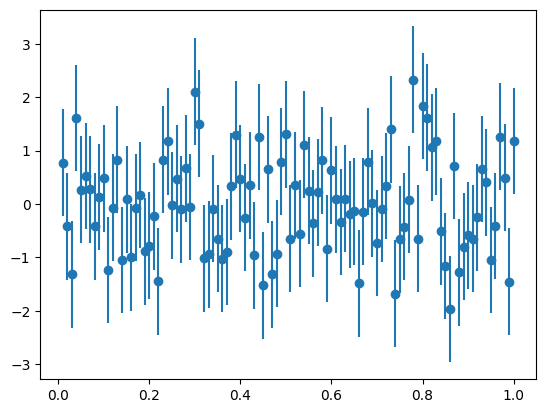

In [64]:
from scipy.stats import chi2

pulls = nll3.pulls(m.values)
cx = xe[:-1] + np.diff(xe)
plt.errorbar(cx, pulls, np.ones_like(pulls), fmt="o");

In [65]:
# m.fval is chi-square distributed for all built-in cost functions
# except UnbinnedNLL and ExtendedUnbinnedNLL
pvalue = chi2(m.ndof).sf(m.fval)
f"chi2/ndof = {m.fmin.reduced_chi2:.2f} p-value = {pvalue:.2f}"

'chi2/ndof = 0.88 p-value = 0.80'

**Exercise**

* Plot histogram of pulls, should look like standard normal distribution
* Compute mean and standard deviation (use `np.mean` and `np.std`)

In [66]:
# do exercise here

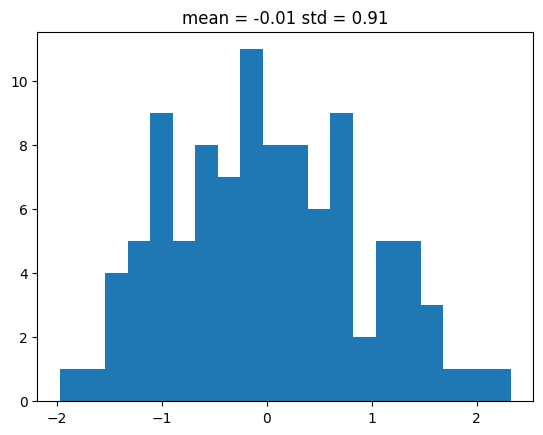

In [67]:
# solution

xe = plt.hist(pulls, bins=20)[1]
plt.title(f"mean = {np.mean(pulls):.2f} std = {np.std(pulls):.2f}");

## Other fits

* To fit yields (counts) instead of fractions, use `ExtendedUnbinnedNLL` or `ExtendedBinnedNLL`
* To fit (x, y) pairs, use `LeastSquares`
* To fit simulated templates, use `Template`
* See documentation how models should be constructed then

## Template fits

* Sometimes PDF/CDF not known in parametric form, but can be Monte-Carlo simulated
* Idea: fit a histogram of simulation output (template) to data histogram
* Additional source of uncertainty from finite size of simulation
* Correct error propagation with Barlow-Beeston method, [Barlow and Beeston, Comput.Phys.Commun. 77 (1993) 219-228](https://doi.org/10.1016/0010-4655(93)90005-W)
* `iminuit.cost.Template`
  * Extension to weighted data and simuation, [H. Dembinski, A. Abdelmotteleb, Eur.Phys.J.C 82 (2022) 11, 1043](https://doi.org/10.1140/epjc/s10052-022-11019-z)
  * Approximation to Barlow-Beeston method for unweighted data
  * Faster computation
  * Allows you to mix parametric models and templates

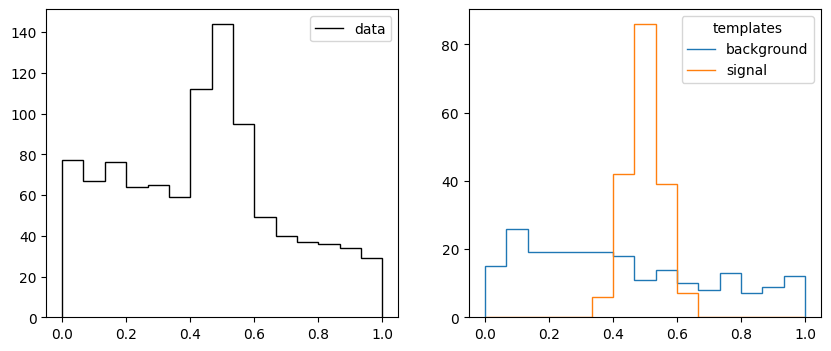

In [68]:
def make_data2(rng, nmc, truth, bins):
    xe = np.linspace(0, 1, bins + 1)
    b = np.diff(truncexpon.cdf(xe, 0, 1, 0, 1))
    s = np.diff(norm.cdf(xe, 0.5, 0.05))
    n = rng.poisson(b * truth[0]) + rng.poisson(s * truth[1])
    t = np.array([rng.poisson(b * nmc), rng.poisson(s * nmc)])
    return xe, n, t

rng = np.random.default_rng(1)
truth = 750, 250
xe, n, t = make_data2(rng, 200, truth, 15)

_, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].stairs(n, xe, color="k", label="data")
ax[0].legend();
ax[1].stairs(t[0], xe, label="background")
ax[1].stairs(t[1], xe, label="signal")
ax[1].legend(title="templates");

In [69]:
from iminuit.cost import Template

c = Template(n, xe, t)
m = Minuit(c, 1, 1)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.352 (χ²/ndof = 0.6)      │              Nfcn = 132              │
│ EDM = 2.75e-07 (Goal: 0.0002)    │            time = 0.5 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │    770    │    70     │            │            │    0    │         │       │
│ 1 │ x1   │    220    │    40     │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │       x0       x1 │
├────┼───────────────────┤
│ x0 │  4.3e+03   -0.8e3 │
│ x1 │   -0.8e3 1.32e+03 │
└────┴───────────────────┘

**Exercise**

* With `make_data2` generate templates with 1 000 000 simulated points
* Fit this data with the `Template` cost function
* Compare parameter uncertainties

In [70]:
# do exercise here

In [71]:
# solution

xe, n, t = make_data2(rng, 1_000_000, truth, 15)
c = Template(n, xe, t)
m = Minuit(c, 1, 1)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.329 (χ²/ndof = 0.3)      │              Nfcn = 110              │
│ EDM = 2.66e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │    820    │    32     │            │            │    0    │         │       │
│ 1 │ x1   │    201    │    20     │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │       x0       x1 │
├────┼───────────────────┤
│ x0 │ 1.03e+03   -0.2e3 │
│ x1 │   -0.2e3      415 │
└────┴───────────────────┘

* With `Template` you can also fit a mix of template and parametric model
* Often template only needed for background(s)

In [72]:
# density model for signal component, as for ExtendedBinnedNLL
def model5(x, s, mu, sigma):
    return s * norm.cdf(x, mu, sigma)

c = Template(n, xe, (t[0], model5))
m = Minuit(c, x0=700, x1_s=300, x1_mu=0.5, x1_sigma=0.1)
m.limits["x1_mu"] = (0, 1)
m.limits["x1_sigma"] = (0, None)

In [73]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.526 (χ²/ndof = 0.2)      │              Nfcn = 106              │
│ EDM = 1.52e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0       │    819    │    34     │            │            │    0    │         │       │
│ 1 │ x1_s     │    202    │    23     │            │            │         │         │       │
│ 2 │ x1_mu    │   0.492   │   0.006   │            │            │    0    │    1    │       │
│ 3 │ x1_sigma │   0.049   │   0.007   │            │            │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────┐
│          │        x0      x1_s     x1_mu  x1_sigma │
├──────────┼─────────────────────────────────────────┤
│       x0 │  1.16e+03    -0.3e3   8.13e-3 -79.31e-3 │
│     x1_s │    -0.3e3       541  -8.17e-3  79.27e-3 │
│    x1_mu │   8.13e-3  -8.17e-3  3.99e-05        -0 │
│ x1_sigma │ -79.31e-3  79.27e-3        -0  4.98e-05 │
└──────────┴─────────────────────────────────────────┘

## Overfitting
* Do not use models with degenerate parameters
* Avoid overfitting

In [78]:
from iminuit.cost import LeastSquares
from numba_stats import bernstein  # Bernstein polynomials > Chebychev polynomials

x = [-0.37, -0.25, -0.15, -0.05, 0.047, 0.147, 0.243, 0.374]
y = [0.96, 0.90, 0.85, 0.81, 0.75, 0.66, 0.42, 0.14]
ey = [0.01, 0.01, 0.01, 0.02, 0.02, 0.03, 0.04, 0.05]

def model(x, p):
    return bernstein.density(x, p, -0.4, 0.4)

In [79]:
start = np.ones(3)
m = Minuit(LeastSquares(x, y, ey, model), start)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 23.81 (χ²/ndof = 4.8)      │              Nfcn = 51               │
│ EDM = 4.25e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   0.950   │   0.011   │            │            │         │         │       │
│ 1 │ x1   │   0.920   │   0.027   │            │            │         │         │       │
│ 2 │ x2   │   0.21    │   0.04    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬────────────────────────────┐
│    │       x0       x1       x2 │
├────┼────────────────────────────┤
│ x0 │ 0.000127 -0.21e-3  0.14e-3 │
│ x1 │ -0.21e-3 0.000737  -0.7e-3 │
│ x2 │  0.14e-3  -0.7e-3  0.00147 │
└────┴────────────────────────────┘

**Exercise**

* Fit with increasing number of parameters (increase the length of the starting parameters)
  * What do you observe? Look out for changes in chi2/ndof and the parameter correlations
* Try fitting this model
  ```py
  def model(x, p):
      return p[0] + bernstein.density(x, p[1:], -0.4, 0.4)
  ```
    * What do you observe?

In [75]:
# do exercise here

In [77]:
# solution

# def model(x, p):
#       return p[0] + bernstein.density(x, p[1:], -0.4, 0.4)

start = np.ones(6)
m = Minuit(LeastSquares(x, y, ey, model), start)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.069 (χ²/ndof = 0.5)      │              Nfcn = 152              │
│ EDM = 2.41e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   0.956   │   0.026   │            │            │         │         │       │
│ 1 │ x1   │   1.02    │   0.13    │            │            │         │         │       │
│ 2 │ x2   │   0.47    │   0.27    │            │            │         │         │       │
│ 3 │ x3   │   1.30    │   0.34    │            │            │         │         │       │
│ 4 │ x4   │   0.29    │   0.25    │            │            │         │         │       │
│ 5 │ x5   │   0.10    │   0.08    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────────────────────────────┐
│    │       x0       x1       x2       x3       x4       x5 │
├────┼───────────────────────────────────────────────────────┤
│ x0 │ 0.000693  -3.0e-3   5.7e-3  -6.2e-3   3.6e-3  -0.7e-3 │
│ x1 │  -3.0e-3   0.0161   -0.033    0.037   -0.022    0.004 │
│ x2 │   5.7e-3   -0.033   0.0721    -0.09     0.05   -0.010 │
│ x3 │  -6.2e-3    0.037    -0.09    0.116    -0.08    0.016 │
│ x4 │   3.6e-3   -0.022     0.05    -0.08    0.062   -0.014 │
│ x5 │  -0.7e-3    0.004   -0.010    0.016   -0.014  0.00649 │
└────┴───────────────────────────────────────────────────────┘